## Diamonds Price Prediction and Feature Analysis

### --- by Zhi Chen

## Project Summary

__1. The goals of this project are to establish machine learning models to predict diamonds prices, and use the model to check if online diamonds retailers have better prices or overcharge customers.__

__2. In this project, various attributes of diamonds are analyzed by EDA, descriptive statistics and statistical tests to see how they influence values of diamonds. Also, prediction models are evaluated by RMSE and Z-Score to get the best model. Diamonds data are scraped by code using Selenium from diamond retail websites.__ 

__3. There are 2 resources of data:__
--(1) __Kaggle.com dataset__, prediction model will be build up based on this dataset; 
--(2) __Web scraping diamonds data from www.bluenile.com__ , I use the prediction model to predict prices of diamonds on www.bluenile.com, compare the prediction results with the prices listed on the website.

### This project has 6 parts 
*__1. Data collection, web scraping, data cleaning__*

*__2. Exploratory data analysis, descriptive statistics__*

*__3. Hypothesis testing__*

*__4. Model fitting with multiple linear regression and lasso regression, evaluate models__*

*__5. Futher feature engineering, model improvement__*

*__6. Business/social case analysis & conclusions__*

## 1. Data Collection, Web Scraping, and Data Cleaning

### 1.1 Get dataset from kaggle.com and cleanup data

In [2]:
# setup the environment
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [3]:
df = pd.read_csv('diamonds.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

look into the dataset and get a preliminary idea of what each column represents, clean up the dataframe, elinimnate the unreasonable data

__The following is an explanation of the meaning of different characteristics:__

price: price in US dollars (continuous variables) - dependent variables in the my model

carat: weight of the diamond (continous variables)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) (categorical variables)

color: diamond color, from J (worst) to D (best) (categorical variables)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) (categorical variables)

x: length in mm (0--10.74) (continous variables)

y: width in mm (0--58.9) (continous variables)

z: depth in mm (0--31.8) (continous variables)

depth: total depth percentage (continous variables)

table: width of top of diamond relative to widest point (continous variables)

In [5]:
df.dtypes # data type of each columns

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df.isna().sum() # there is no NaN values in the dataframe

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df.describe()  # check the values in dataframe, as you can see there are 0 values in the 
# dataset, since none of these column values can be 0, so we need to remove them

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
len(df[(df.x == 0) | (df.y == 0) | (df.z == 0)])
# since there are only 20 rows of values with 0, it is ok to just remove it

20

In [9]:
df = df[(df.x != 0) & (df.y != 0) & (df.z != 0)]
df.shape

(53920, 10)

### 1.2 Webscraping data from bluenile.com, an online jewelry retailer website

__Selenium is needed to to scrap data from www.blueneil.com. Since the website has many button tags and need to scroll down to get more items to load, beautifulsoup request can only get 60 items at one time__

The code of webscraping using Selenium is in a separate selenium webscraping.ipynb file, in github repository (when running it, an geckodriver.exe file is needed to help to open firefox browser). Please check that. After web scraping, the data from www.blueneil.com was saved to .csv file. The data is read into dataframe as following:

In [462]:
df_blue = pd.read_csv('bluenile.csv',index_col=False)
df_blue.head()

,Unnamed: 0,shape,price,carat,cut,color,clarity,polish,symmetry,fluorescence,depth,table,lxwratio,pricepercarat,culet,date
0,0,Round,$425,0.26,Very GoodVery Good,J,VVS1,Excellent,Excellent,None,63.2,55.0,1.01,"$1,635",None,Jul 6
1,1,Round,$425,0.38,Very GoodVery Good,J,SI1,Good,Good,Faint,64.1,56.0,1.00,"$1,118",None,Jul 29
2,2,Round,$425,0.31,Very GoodVery Good,E,VS2,Excellent,Very Good,None,63.7,57.0,1.01,"$1,371",None,Jul 9
3,3,Round,$425,0.41,IdealIdeal,K,SI2,Excellent,Excellent,None,62.6,58.0,1.01,"$1,037",None,Jul 29
4,4,Round,$425,0.38,Very GoodVery Good,I,SI2,Excellent,Excellent,Faint,64.2,57.0,1.00,"$1,118",None,Jul 29


In [463]:
df_blue.index

RangeIndex(start=0, stop=14000, step=1)

In [464]:
df_blue.columns

Index(['Unnamed: 0', 'shape', 'price', 'carat', 'cut', 'color', 'clarity',
       'polish', 'symmetry', 'fluorescence', 'depth', 'table', 'lxwratio',
       'pricepercarat', 'culet', 'date'],
      dtype='object')

There are many index such as 'polish', 'fluorescence' not in the dataframe created from Kaggle, so these can be deleted in order to keep consistent. Also, some of the classifications are not as same as the Kaggle dataset, these also need to be changed to be consistent. 

In [465]:
df_blue.cut.unique()

array(['Very GoodVery Good', 'IdealIdeal', 'GoodGood', 'Astor IdealAstor'],
      dtype=object)

In [468]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [466]:
df_blue.color.unique()

array(['J', 'E', 'K', 'I', 'G', 'F', 'H', 'D'], dtype=object)

In [467]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [469]:
df_blue.clarity.unique()

array(['VVS1', 'SI1', 'VS2', 'SI2', 'VVS2', 'IF', 'VS1', 'FL'],
      dtype=object)

In [470]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [472]:
df_blue.drop(columns=['Unnamed: 0', 'shape', 'polish', 'symmetry', 'fluorescence', 'pricepercarat', 'culet', 
                     'date'], inplace=True)

In [476]:
df_blue.replace(['GoodGood', 'Very GoodVery Good', 'IdealIdeal', 'Astor IdealAstor'], 
                ['Good', 'Very Good', 'Premium', 'Ideal'], inplace=True)
df_blue.cut.unique()

array(['Very Good', 'Premium', 'Good', 'Ideal'], dtype=object)

In [478]:
df_blue.shape

(14000, 8)

In [481]:
df_blue = df_blue[(df_blue['color'] != 'K') & (df_blue['clarity'] != 'FL')]
df_blue.shape

(13494, 8)

In [483]:
df_blue.clarity.unique()

array(['VVS1', 'SI1', 'VS2', 'SI2', 'VVS2', 'VS1', 'IF'], dtype=object)

In [484]:
df_blue.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'lxwratio'],
      dtype='object')

## 2. Exploratory data analysis, descriptive statistics

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 1st descriptive statistics and visualization -- diamonds weight distribution

In [48]:
df.carat.describe()

count    53920.000000
mean         0.797698
std          0.473795
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Text(0.5, 0, 'diamond weight by carat')

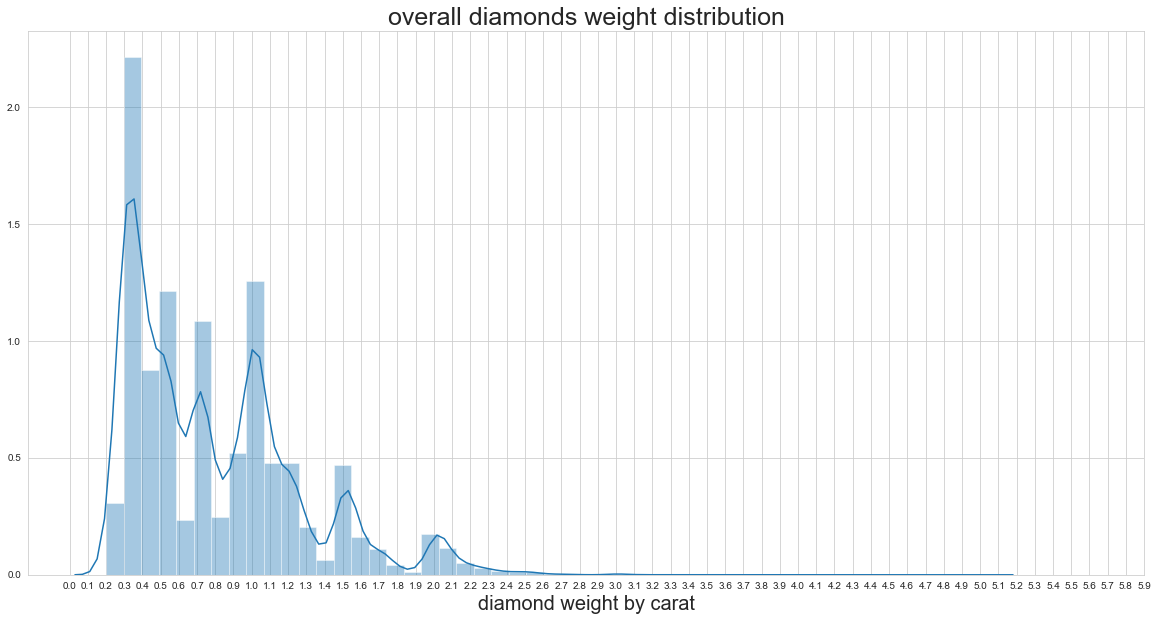

In [49]:
# analysis of overal diamonds weight distribution
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.distplot(df.carat, norm_hist=True)
plt.title('overall diamonds weight distribution', fontsize = 25)
plt.xticks(np.arange(0,6,0.1));
plt.xlabel('diamond weight by carat', fontsize = 20)

In [43]:
df.clarity.value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

Text(0.5, 0, 'diamond weight by carat')

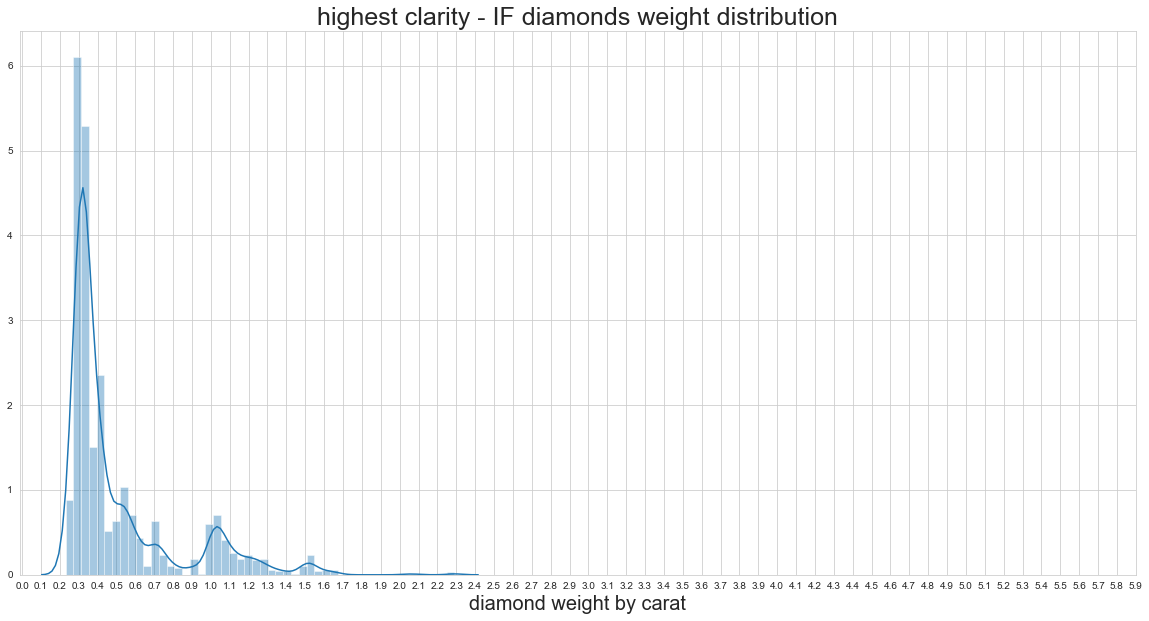

In [51]:
plt.figure(figsize=(20,10))
sns.distplot(df[df.clarity == 'IF'].carat, norm_hist=True)
plt.title('highest clarity - IF diamonds weight distribution', fontsize = 25)
plt.xticks(np.arange(0,6,0.1));
plt.xlabel('diamond weight by carat', fontsize = 20)

Text(0.5, 0, 'diamond weight by carat')

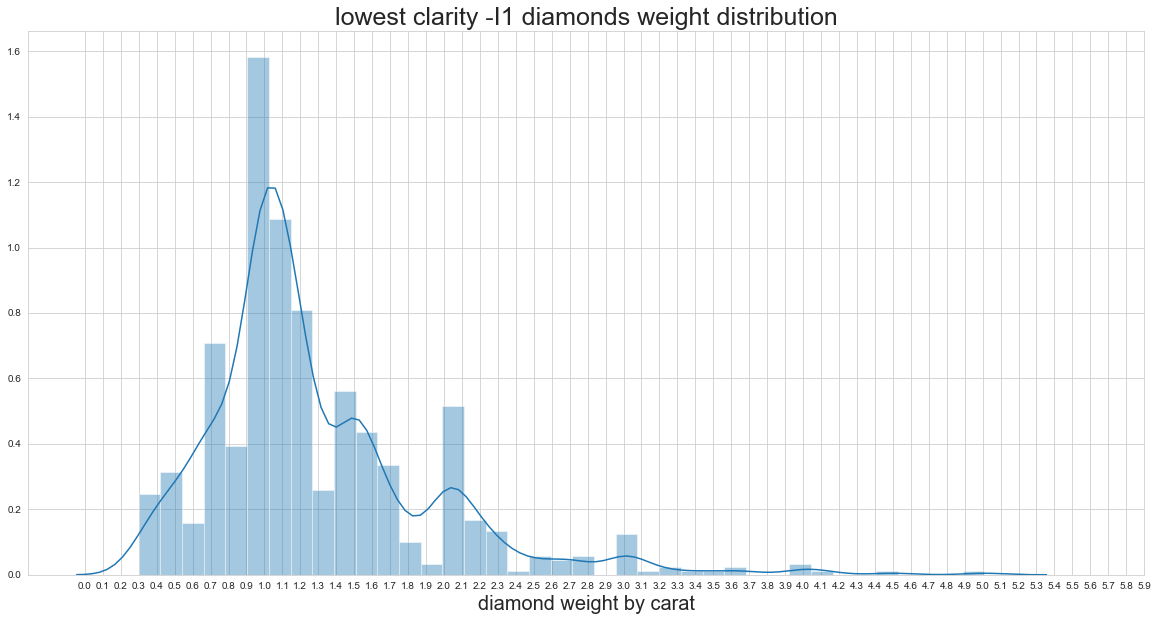

In [52]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.distplot(df[df.clarity == 'I1'].carat, norm_hist=True)
plt.title('lowest clarity -I1 diamonds weight distribution', fontsize = 25)
plt.xticks(np.arange(0,6,0.1));
plt.xlabel('diamond weight by carat', fontsize = 20)

(1) An important finding is that you can see from the above plots that diamond weight distribution are very different for highest clarity comparing to the lowest clarity. For high clarity, the distribution is to the left (0.25 - 0.4 carat), which means for most high clairty (most desirable), it is very hard to find big ones. But for low clarity (the most common ones in Geology diamond forming process), it is easier to get big ones. This is consistent with natural diamond forming mechanism (when diamonds were formed under high pressure in mantle underneath, the larger the crystal growth, the more flaws, the more graining appears) (solid state & materials science). Big ones are much more likely to include impurities.

(2) As you can see from the above descriptive statistics and visualization, overall diamonds weight distribution are generally in the range of 0 -5.3 carat. Overall, most diamonds are in the 0.2 - 1.0 carat range. The higher the weight(big ones), the fewer of them. Although the overall diamonds weight distribution has a long tail to right, when it goes beyond 2.4 carat, the quantity become very flat and close to 0. This is also consistant with common sense in precious stone knowledge, beyond 1 carat, there are fewer and fewer. 

In [158]:
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

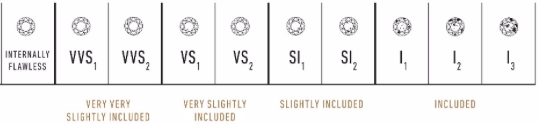

### 2nd descriptive statistics and visualization -- diamonds color distribution and clarity distribution

In [97]:
df.color.describe()

count     53920
unique        7
top           G
freq      11284
Name: color, dtype: object

In [87]:
df.color.value_counts(normalize = True)

G    0.209273
E    0.181695
F    0.176892
H    0.153895
D    0.125631
I    0.100538
J    0.052077
Name: color, dtype: float64

In [90]:
color = ['J','I','H','G','F','E','D']
colorquan = [df.color.value_counts(normalize=True)[i] for i in color]
colordict = dict(zip(color, colorquan))
colordict

{'J': 0.05207715133531157,
 'I': 0.10053783382789318,
 'H': 0.1538946587537092,
 'G': 0.20927299703264096,
 'F': 0.17689169139465874,
 'E': 0.18169510385756676,
 'D': 0.12563056379821957}

In [91]:
pd.DataFrame(colordict.items(),columns=['colors','quantity'])

,colors,quantity
0,J,0.052077
1,I,0.100538
2,H,0.153895
3,G,0.209273
4,F,0.176892
5,E,0.181695
6,D,0.125631


Text(0, 0.5, 'quantity percentage')

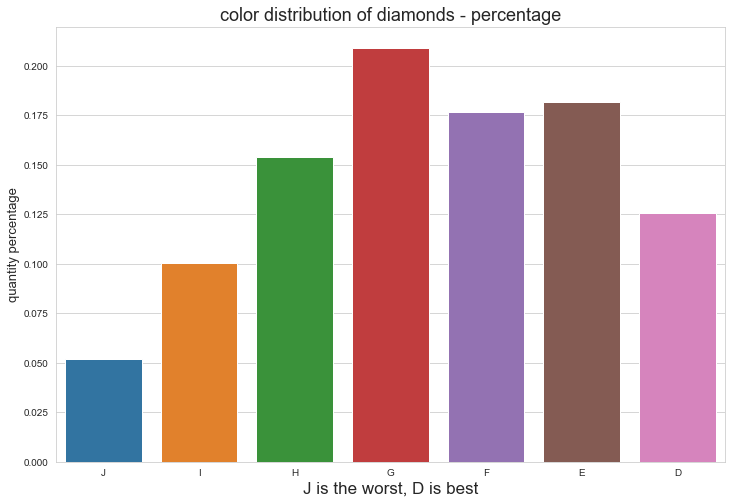

In [180]:
plt.figure(figsize=(12,8))
sns.barplot(x='colors', y = 'quantity',
            data=pd.DataFrame(colordict.items(),columns=['colors','quantity']))
plt.title('color distribution of diamonds - percentage', fontsize=18)
plt.xlabel('J is the worst, D is best', fontsize=17)
plt.ylabel('quantity percentage', fontsize=13)

Diamonds colors are categorized with letters from D all the way to Z, D is the best. The levels beyond J are not usually sold on market or used for diamond rings. 

As we can see here, the middle level 'G' has the largest percentage, more than 20%, while perfect colorless 'D' only consist of 12%. And, poorest colorless level 'J' and 'I' are not of big percentages neither. 
Truely colorless diamonds are not many, during diamonds forming process, it is every easy that impurities nitrogen, boron, nitrogen... get into carbon lattice. J and I are not sold too many neither because people prefer better color level.

General mid-level colors (E, F, G, H) adds up to more than 72%. This plot explains the color level people usually purchase, and is consistent with the commercial diamonds market. The most usually seen diamond rings and neckless are with level 'E','F','G','H' . "If you are sensitie to color, but don't want to go higher than the near colorless rang, you should pick H or G", "If you cannot afford the price tag of D, E or F stone, but still want best color possible, choose G - this ......" --- jewelrynotes.com

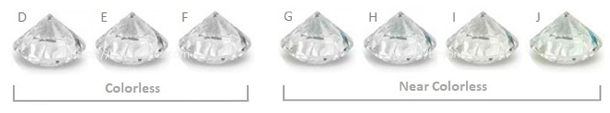

In [11]:
clarity = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [12]:
clarityquan = [df.clarity.value_counts(normalize=True)[i] for i in clarity]
claritydict = dict(zip(clarity, clarityquan))
claritydict

{'I1': 0.013686943620178041,
 'SI2': 0.17034495548961423,
 'SI1': 0.24226632047477745,
 'VS2': 0.2272626112759644,
 'VS1': 0.1515207715133531,
 'VVS2': 0.0939540059347181,
 'VVS1': 0.06776706231454006,
 'IF': 0.0331973293768546}

In [13]:
pd.DataFrame(claritydict.items(),columns=['clarity','quantity'])

,clarity,quantity
0,I1,0.013687
1,SI2,0.170345
2,SI1,0.242266
3,VS2,0.227263
4,VS1,0.151521
5,VVS2,0.093954
6,VVS1,0.067767
7,IF,0.033197


Text(0, 0.5, 'quantity percentage')

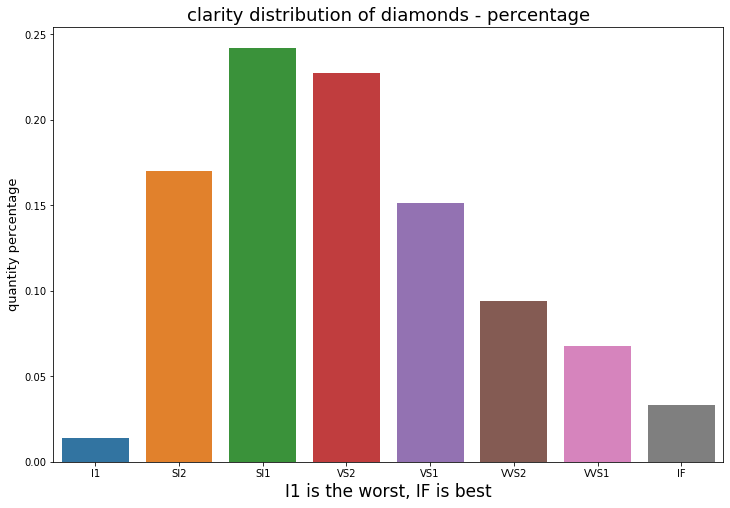

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x='clarity', y = 'quantity',
            data=pd.DataFrame(claritydict.items(),columns=['clarity','quantity']))
plt.title('clarity distribution of diamonds - percentage', fontsize=18)
plt.xlabel('I1 is the worst, IF is best', fontsize=17)
plt.ylabel('quantity percentage', fontsize=13)

As we can see from the above plot of clarity distribution. The top and bottom clarity has the least distribution. This is similar as the previous plot showing color distribution. Both color distribution plot and clarity distribution plot show that middle levels consists majority of the diamonds. The only difference between this clarity distribution and color distribution is that in color distribution, majority is leaning to upper-middle while in clarity distribution, the majority is leaning to lower-middle

The reason behind is similar to previously discussed in the color section

### 3rd descriptive statistics and visualization -- diamonds prices

We all know that diamonds' prices are determined by weight, size, clarity, cut, colors... But how these matters, let's take a quick look from the following descriptive statistics and visualizations!

In [98]:
df.price.describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

In [105]:
df['price/carat'] = df['price']/df['carat']

In [112]:
df.groupby('clarity')['price/carat'].mean().sort_values()

clarity
I1      2796.257910
SI1     3848.542714
VVS1    3848.887225
SI2     4010.271135
VS2     4079.639432
VS1     4155.640363
VVS2    4204.166013
IF      4259.931736
Name: price/carat, dtype: float64

__The following is a scatter plot with diamond price vs. carat weight, it is like square function or cubic function relationship. As the carat value goes up, the price goes up and faster and faster (like exponential relationship). The ratio price/carat becomes larger and larger. This descriptive analysis is consistent the professional diamond knowledge, prices increases faster as their carat weight is increased because it is more and more difficult to find rough diamond in nature that can be used to cut a finished diamond that is larger and of equal color and clarity when compared to a smaller weight diamond.__

Text(0, 0.5, 'price')

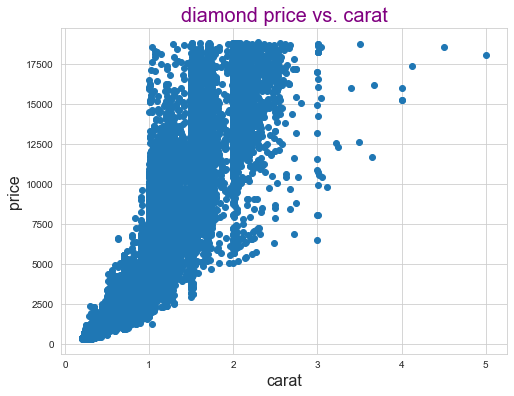

In [189]:
plt.figure(figsize = (8,6))
plt.scatter(df.carat, df.price)
plt.title('diamond price vs. carat', color='purple', fontsize=20)
plt.xlabel('carat',fontsize=16)
plt.ylabel('price',fontsize=16)

The following plots are diamonds price distribution range box plots for various clarities, colors and cut levels

As you can see from the following plots, high level categories, like clarity level 'IF', cut level 'Ideal', 'Premium', color level 'D', have some top price/carat values (many values goes to the top). These high level diamonds of course have some prices/carat individual diamonds which are on top, which make sense. But one thing to notice is that: these high levels diamonds does not necessarily have higher median price/carat, does not lift the overall box up neither, because another important fact is the carat value, the low level diamonds have more larger ones, which makes the price/carat values larger. Thus, low level categories diamonds does not necessarily have low price or price/carat values. 

There is no clear trends that the price/carat value increase as the grade levels go up, we need to do further analysis or modeling in the next steps. 

Text(0.5, 1.0, 'price distribution range of different cut level')

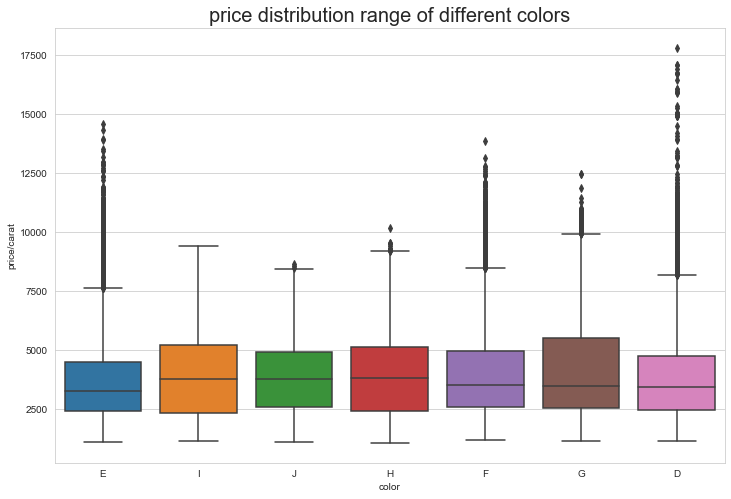

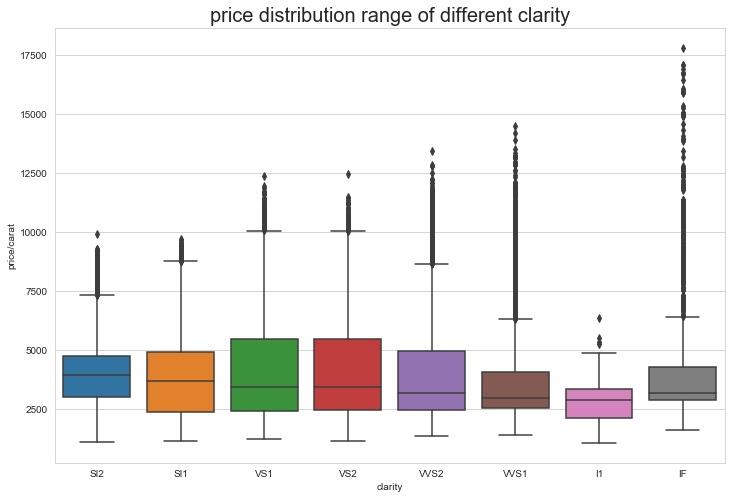

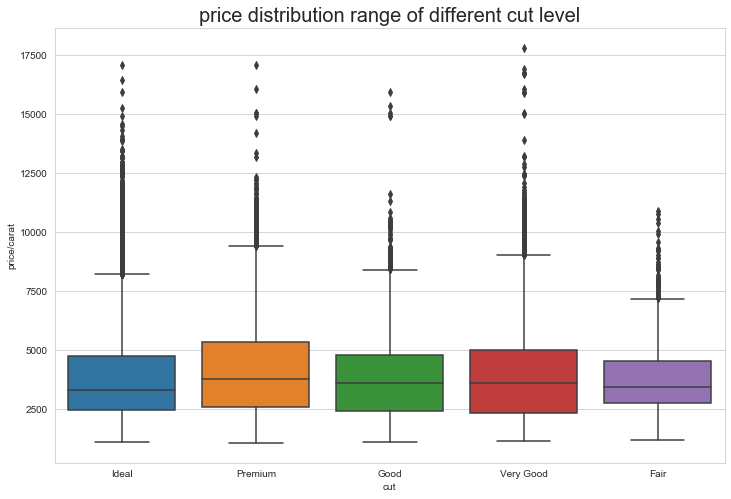

In [182]:
plt.subplots(figsize = (12,8))
sns.boxplot(x='color',y='price/carat',data=df)
plt.title('price distribution range of different colors', fontsize=20)

plt.subplots(figsize = (12,8))
sns.boxplot(x='clarity',y='price/carat',data=df)
plt.title('price distribution range of different clarity', fontsize=20)

plt.subplots(figsize = (12,8))
sns.boxplot(x='cut',y='price/carat',data=df)
plt.title('price distribution range of different cut level', fontsize=20)

## 3. Hypothesis Testing

### 3.1 Analysis of  95% confidence interval of the diamonds weight of clarity grade IF

In [152]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [169]:
# sample size
df_IF = df[df['clarity']=='IF']
df_IF.shape

(1790, 11)

sample size n = 1790, 
we don't know the population variance

In [173]:
# calculate the confidence interval using confidence interval formula
print('Confidence Interval:', '(', df_IF.carat.mean()-1.96*df_IF.carat.std()/np.sqrt(len(df_IF)),
      df_IF.carat.mean()+1.96*df_IF.carat.std()/np.sqrt(len(df_IF)), ')')

Confidence Interval: ( 0.4906026438441855 0.5196431662116805 )


In [213]:
# calculate the confidence interval using stats.norm.interval
print('Mean value of carat weight:', df_IF.carat.mean())
print('Confidence Interval:', 
       stats.norm.interval(alpha=0.95, loc=df_IF.carat.mean(), scale=df_IF.carat.std()/np.sqrt(len(df_IF))))

Mean value of carat weight: 0.505122905027933
Confidence Interval: (0.4906029106573922, 0.5196428993984739)


__Conclusion:__ As we can see the 95% confidence interval is ( 0.4906026438441855 0.5196431662116805 ), this means that based on my analysis, for diamonds with 'IF' clarity, I am 95% certain to contain the true mean of the carat weight value of diamond population with 'IF' clarity in the interval. There is 95% chance that this confidence interval contains the true population mean of carat weight of diamonds with clarity IF. 

__Central Limit Theorem holds for this sample size__  Another way I tried to calculate the confidence interval is using stats.norm, although the weight distribution of clarity IF diamonds is not normal distribution (as you can see from the previous IF diamonds weight distribution plot), but since our sample quantity is 1790(large enough), the distribution of the sample means is approximately normally distributed. __We can see here the result with stats.norm.interval is almost the same as formula calculation.__

### 3.2 Test of the price/carat values from 2 groups (color 'E' and 'F')

In [190]:
df.color.value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Diamond with color E and color F are close, and, from the plots in previous section, the boxplots show similar price/carat shape in plot. __Is there a statistically significant difference between color E diamond and color F diamond in the price/carat value? Hereby run a statistical test on the 2 samples, using significance level alpha = 0.05__

Ho: there is no statistical difference of the price/carat values between the color E diamonds and color F diamonds;

Ha: there is significant statistical difference of the price/carat values between the color E diamonds and color F diamonds;

n>30, population standard deviation unknown and comparing mean values, so use __t test__

In [199]:
df[df['color']=='E']['price/carat'].mean(), df[df['color']=='F']['price/carat'].mean()

(3804.6114748198997, 4134.951904961751)

In [201]:
len(df[df['color']=='E']), len(df[df['color']=='F'])

(9797, 9538)

In [202]:
df[df['color']=='E']['price/carat'].var(), df[df['color']=='F']['price/carat'].var()

(3766714.3448758554, 4585326.964238926)

In [203]:
# perform the t-test of the color E samples and color F samples, sizes different, variance
# different, 
stats.ttest_ind(df[df['color']=='E']['price/carat'], 
                df[df['color']=='F']['price/carat'], equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-11.230487887983761, pvalue=3.5683613489211576e-29)

Because the test statistic and the P value are all the the rejection region, so we can reject the Null hypothesis and say that there is statistical price difference between the color E diamonds and color F diamonds.

__Conclusion:__ Although color E and color F are close and they do look similar in the previous boxplot of 'price/carat', but a careful check will find out that color F have 12% higher average carat weight and since its color is close to color E, so the price/carat value of color F is generally higher than color E (in which the carat weight plays a important role!!)

In [206]:
df[df['color']=='E'].carat.mean(), df[df['color']=='F'].carat.mean()

(0.6578666938858835, 0.7364803942126231)

### 3.4 Perform a statistical test to determine if there is statistically significant difference in carat weight of diamonds with different cut levels

Diamond cutting process is super important, and is related to many diamond features such as carat weight. 

Ho: there is no statistical difference in carat weight of diamonds with different cut levels;

Ha: there is significant statistical difference in carat weight of diamonds with different cut levels;

In [204]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [205]:
stats.f_oneway(df['carat'][df['cut'] == 'Ideal'],
                df['carat'][df['cut'] == 'Premium'], 
                df['carat'][df['cut'] == 'Good'],
                df['carat'][df['cut'] == 'Very Good'],
                df['carat'][df['cut'] == 'Fair'])

F_onewayResult(statistic=494.27852286396956, pvalue=0.0)

__Conclusion:__ We can see the test statistics and P value are in rejection region, so __Null hypothesis can be rejected, and we can say that there is statistically significant difference in carat weight of diamonds with different cut levels__ 

__After reviewing some diamond processing topics, this is consistent with diamond processing, because diamond size is affected by cutting, different cutting approaches for different raw precious stone can affect the final diamond size. So different cut level groups has different carat weight means and distribution__

### 3.4 Perform a Chi-Square test with different diamond clarity levels and diamond color levels

Ho: no association or relationship between the diamond clairity levels category and the color levels category (they are independent, no statistical difference between expected and observed)

Ha: there is an association or relationship between the distributions diamond clairity levels category and the color levels category (they are not independent, there is statistical difference between expected and observed)

In [207]:
df.groupby('clarity').color.value_counts()

clarity  color
I1       H         161
         G         148
         F         143
         E         102
         I          92
         J          50
         D          42
IF       G         681
         F         385
         H         299
         E         158
         I         143
         D          73
         J          51
SI1      E        2426
         H        2274
         F        2131
         D        2083
         G        1976
         I        1423
         J         750
SI2      E        1713
         F        1605
         H        1561
         G        1545
         D        1370
         I         912
         J         479
VS1      G        2147
         F        1364
         E        1281
         H        1169
         I         962
         D         705
         J         542
VS2      E        2470
         G        2345
         F        2201
         D        1697
         H        1641
         I        1169
         J         731
VVS1     G         

In [209]:
# the contingency table of diamond clairity levels category and the color levels category
df.groupby('clarity').color.value_counts().unstack()

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,42,102,143,148,161,92,50
IF,73,158,385,681,299,143,51
SI1,2083,2426,2131,1976,2274,1423,750
SI2,1370,1713,1605,1545,1561,912,479
VS1,705,1281,1364,2147,1169,962,542
VS2,1697,2470,2201,2345,1641,1169,731
VVS1,251,656,734,999,585,355,74
VVS2,553,991,975,1443,608,365,131


In [208]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat_cc, p_cc, dof_cc, expected_cc = chi2_contingency(df.groupby('clarity').color.value_counts().unstack())
print(stat_cc)
print(p_cc)
print(dof_cc)
print(expected_cc)

2048.739964194699
0.0
42
[[  92.71535608  134.09098665  130.54606825  154.44347181  113.57425816
    74.19692136   38.43293769]
 [ 224.8787092   325.23423591  316.6361276   374.59866469  275.47143917
   179.96272255   93.21810089]
 [1641.1120549  2373.48314169 2310.73616469 2733.73316024 2010.3259273
  1313.32572329  680.28382789]
 [1153.91672849 1668.86952893 1624.75018546 1922.17247774 1413.52244065
   923.44000371  478.32863501]
 [1026.40170623 1484.44899852 1445.20511869 1709.76038576 1257.31936202
   821.39410237  425.47032641]
 [1539.47692878 2226.49180267 2167.63078635 2564.43130564 1885.82514837
  1231.99061573  638.15341246]
 [ 459.05408012  663.9139095   646.36224036  764.68353116  562.33108309
   367.36524481  190.28991098]
 [ 636.4444362   920.46739614  896.13330861 1060.17700297  779.63034125
   509.32466617  263.82284866]]


__Conclusion:__ As we can see the test statistics and P value are in rejection region, so __Null hypothesis can be rejected, and we can determine that there is association between the distributions of diamond clairity levels category and the color levels category (they are not independent)__

__Result Explanation__ As different feature, clarity category and color category are related. In diamonds forming process, clarity and color are both influenced by the crystal growing process, graining and impurities nitrogen, boron, nitrogen... in carbon lattice. In different region where geologic structure, underneath pressure are different, according to solid state materials science, certain clarities tend to have more of certain color ones.

## 4. Model fitting with multiple linear regression and lasso regression, evaluate models

In [221]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


Take a look at the data I have here, I have 10 original ('additional feature price/carat is the one I added in previous EDA step to do visualization') features of the diamonds, now set the price to be the target variable (dependent) variable and the rest 9 features to be independent variables. Start to build up model using features to predict the diamonds prices! 

__4.1 find out the extreme values and outliers, eliminate the irrational values__

In [222]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price/carat'],
      dtype='object')

In [224]:
feat = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price/carat']

In [226]:
n = 3
row_groups = [feat[i:i+n] for i in range(0, len(feat), n)]
row_groups

[['carat', 'depth', 'table'], ['x', 'y', 'z'], ['price/carat']]

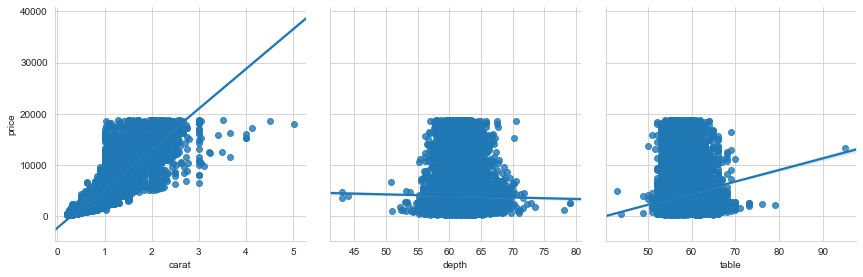

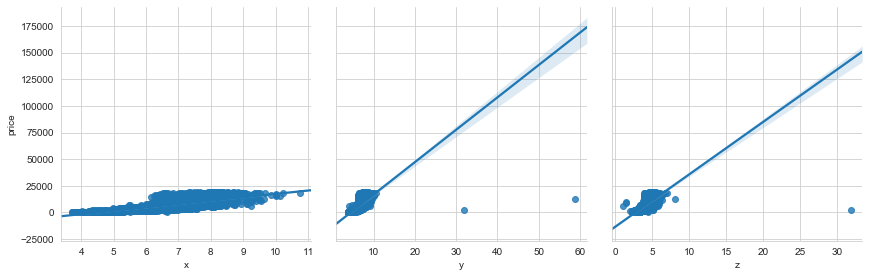

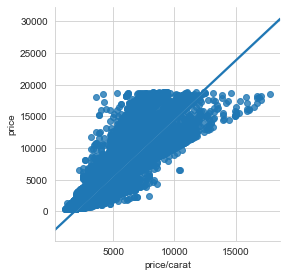

In [227]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'], x_vars=i, kind='reg', height = 4)

As we can see there are some obvious extreme values in the above plots. And it is irrational to have dimension values greater than 30mm. Show extreme values, these are all weird shape diamonds, it is very unusual, so drop these

In [230]:
df[(df['y']>30) | (df['z']>10) | (df['table']>80)]  # outliers

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat
24068,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,6105.000000
24933,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87,6660.199005
48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,3862.745098
49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,4068.627451


In [234]:
df = df[(df['y']<30) & (df['z']<10) & (df['table']<80) & (df['depth']<75) & (df['depth']>45)]
df.shape

(53910, 11)

__4.2 make categorical values to be dummy variables__

In [237]:
pd.set_option('display.max_columns',360)
df1 = pd.concat([df, pd.get_dummies(df[['clarity','color','cut']])], 1)
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price/carat,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [240]:
df1.shape

(53910, 31)

__4.3   First Model__ Multiple Linear Regression

__Train Test Split__

In [241]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'price/carat', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [242]:
features=['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 
          'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D', 'color_E', 'color_F', 'color_G',
          'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good']

In [243]:
df_features = df1[features]
target = df1['price']

In [246]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34, test_size=0.2)
print('Training set features:', X_train.shape, 'Target:', y_train.shape)
print('Training set features:', X_test.shape, 'Target:', y_test.shape)

Training set features: (43128, 26) Target: (43128,)
Training set features: (10782, 26) Target: (10782,)


In [247]:
# instantiate a linear regression object and fit a model to training set
lm = LinearRegression()
# fit the linear regression to the data
lm = lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

-912.5959283030875
[11525.05976796    50.44967368   -25.78476027 -1514.72129956
  1620.82859146 -2022.55100915 -3849.30159364  1495.13140225
  -132.42181403 -1086.72379345   777.27926138   470.78324175
  1182.9317434   1142.32155235   827.79223011   615.26503346
   564.85495631   346.17903366  -144.25860693  -654.94146133
 -1554.89118528  -505.58934176   -33.47734698   233.65616387
   206.20115545    99.20936942]


In [249]:
# check various error value for train set
from sklearn import metrics
y_train_pred = lm.predict(X_train)

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 734.3802861158848
Mean Squared Error: 1271188.5430070723
Root Mean Squared Error: 1127.4699743261779


In [258]:
price_std = target.std()
print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.18418266491400306
Z-Score of Root Mean Squared Error: 0.2827696064395026


Predicting test set

Text(0, 0.5, 'Predictions')

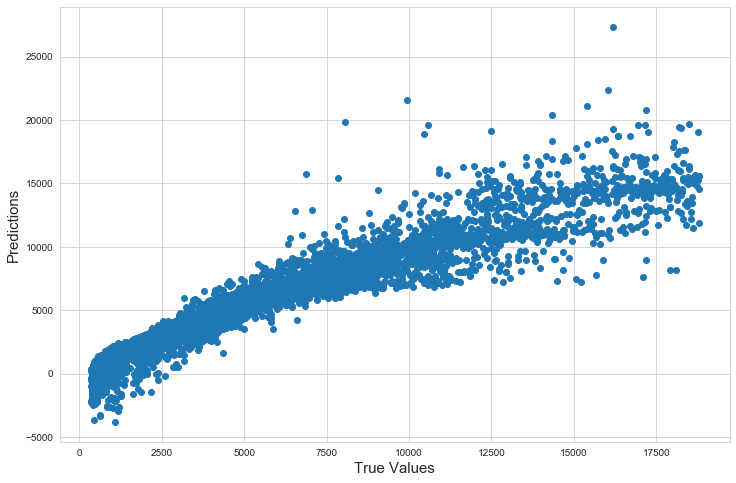

In [261]:
y_pred = lm.predict(X_test)
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)

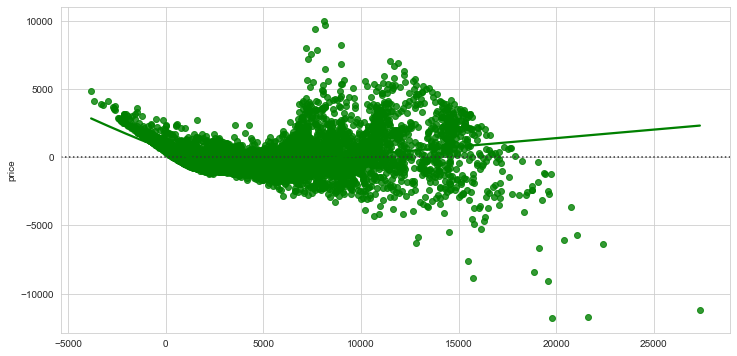

In [265]:
plt.figure(figsize=(12,6))
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [284]:
print ("R2 Score:", lm.score(X_test, y_test))

R2 Score: 0.9214261600657141


In [285]:
from sklearn.metrics import r2_score
print ("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.9214261600657141


In [286]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_mse = metrics.mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:729.1948230024361
Mean Squared Error:1228635.0571107827
Root Mean Squared Error:1108.4381160492374


In [287]:
print('Z-Score of Mean Absolute Error  Z:', test_mae/price_std )
print('Z-Score of Root Mean Squared Error Z:' , test_rmse/price_std)

Z-Score of Mean Absolute Error  Z: 0.18288215013561815
Z-Score of Root Mean Squared Error Z: 0.2779964140731168


In [288]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  1127 vs. Testing:  1108


__comments on Multiple Linear Model:__ generally, this model predicts the price of the diamonds well, it contains all the important independent variables, gives results close to the true values, the R^2 score is 0.92, it is good, and the  Z score of RMSE is 0.278, this value is low, which means this model fits well.

But the __drawback of this model__ is that the variance of the residuals is biased, it is not the same across all values of the x-axis. As you can see from the residual plot above, at low price range, this model underestimate, and at highend, it overestimate. So I need to further work on this

__4.4   Second Model Lasso Regression__

__Train Test Split__

In [290]:
from sklearn.linear_model import Lasso
la = Lasso(normalize=True)
la = la.fit(X_train , y_train) 

In [291]:
print(la.intercept_)
print(la.coef_)

-1912.58773528163
[ 7583.60978615    -0.            -0.             0.
     0.             0.         -2185.12522298     0.
  -144.83674039  -711.37431961     0.             0.
     0.            41.09522528     0.             0.
     0.             0.            -0.            -0.
  -490.23165564    -0.            -0.             0.
    -0.            -0.        ]


In [292]:
y_train_pred1 = la.predict(X_train)

train_mae1 = metrics.mean_absolute_error(y_train, y_train_pred1)
train_mse1 = metrics.mean_squared_error(y_train, y_train_pred1)
train_rmse1 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1))

print('Mean Absolute Error:', train_mae1 )
print('Mean Squared Error:',  train_mse1)
print('Root Mean Squared Error:' , train_rmse1)

Mean Absolute Error: 877.6433312904663
Mean Squared Error: 1986633.5928186362
Root Mean Squared Error: 1409.479901530574


In [293]:
print('Z-Score of Mean Absolute Error:', train_mae1/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse1/price_std)

Z-Score of Mean Absolute Error: 0.2201130540363846
Z-Score of Root Mean Squared Error: 0.3534977304192813


Predicting test set with Lasso Model

Text(0, 0.5, 'Predictions')

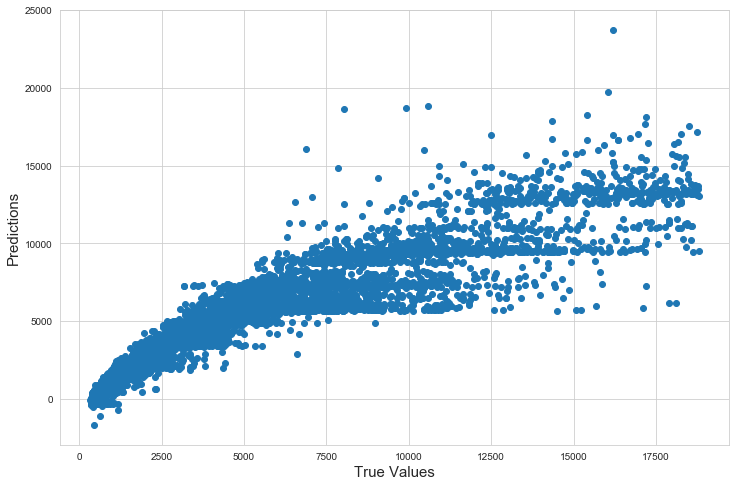

In [294]:
y_pred1 = la.predict(X_test)
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred1)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)

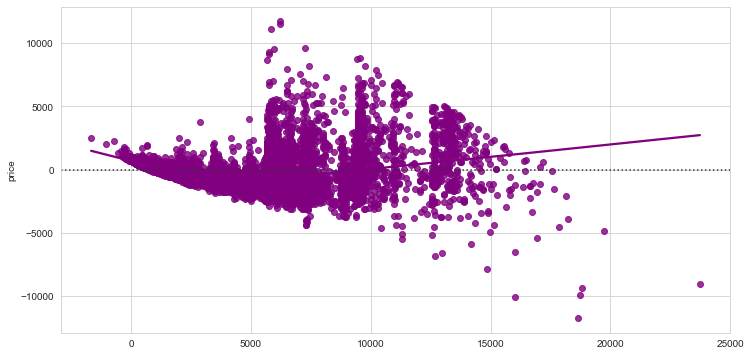

In [296]:
plt.figure(figsize=(12,6))
sns.residplot(y_pred1, y_test, lowess=True, color="purple")

In [297]:
print ("Lasso R2 Score:", la.score(X_test, y_test))

Lasso R2 Score: 0.8760992070352561


In [298]:
print ("Lasso R2 Score:", r2_score(y_test, y_pred1))

Lasso R2 Score: 0.8760992070352561


In [300]:
test_mae1 = metrics.mean_absolute_error(y_test, y_pred1)
test_mse1 = metrics.mean_squared_error(y_test, y_pred1)
test_rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred1)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred1)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred1))))

Mean Absolute Error:868.5536739739314
Mean Squared Error:1937398.7317868622
Root Mean Squared Error:1391.904713616152


In [301]:
print('Z-Score of Mean Absolute Error  Z:', test_mae1/price_std )
print('Z-Score of Root Mean Squared Error Z:' , test_rmse1/price_std)

Z-Score of Mean Absolute Error  Z: 0.21783336687788388
Z-Score of Root Mean Squared Error Z: 0.34908987115665974


In [302]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(train_rmse1), "vs. Testing: ", int(test_rmse1))

Training:  1409 vs. Testing:  1391


__comments on Lasso Model and comparison with multilinear regression model:__ generally, Lasso model predicts the price not as well as the previous multiple linear regression moel. Lasso Model also gives results close to the true values, and the R^2 score is 0.876, it is good, but not as good as multiple linear (0.921). and the  Z score of RMSE is 0.349, this value is higher than the multiple linear model (0.278), which means the residuals are larger. So based on the same current independent variables, multilinear regression fits better than the Lasso model, multilinear regression predicts more accurate. 

But the __good thing about Lasso Model__ is that the plot of residuals looks better, they are not going to, the residuals are not biased as much as the multilinear regression model. But it is still biased, at lowend it is under-estimated a little and at highend, it is over-estimated.  

## 5. Futher feature engineering, model improvement

#### The 2 models in previous section both have some drawbacks, let us look into further processing and feature engineering to improve the models, the approaches are as following:

__5.1 Create new features 'carat2' based on EDA__

Based on the plots in EDA, scatter plot with diamond price vs. carat weight, it is like square or cubic function relationship. As the carat value goes up, the price goes up and faster and faster. The ratio price/carat becomes larger and larger. It is common sense in jewelry industry that as the diamond gets larger and larger, they are very rare, 1 four carats diamonds are much more valuable than 2 two carats diamonds. So make a square or cubic variable of carat feature may help.

In [330]:
df_features['carat^2'] = df_features['carat'].map(lambda x: x**2)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


__Try with Multilinear Regression Model__

In [331]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_features, target, random_state=34, test_size=0.2)
print('Training set features:', X_train2.shape, 'Target:', y_train2.shape)
print('Training set features:', X_test2.shape, 'Target:', y_test2.shape)

Training set features: (43128, 27) Target: (43128,)
Training set features: (10782, 27) Target: (10782,)


In [332]:
# instantiate a linear regression object and fit a model to training set
lm2 = LinearRegression()
# fit the linear regression to the data
lm2 = lm2.fit(X_train2, y_train2)
print(lm2.intercept_)
print(lm2.coef_)

16370.503544162682
[23229.22815563   -48.08455733   -51.57454296 -3019.58463348
   631.3048708  -2808.10085536 -3675.92425281  1445.91638853
  -132.33829021 -1085.25883664   760.26379134   453.48210292
  1135.54621595  1098.31288092   840.68644979   624.95133466
   566.50574952   339.65761107  -176.22239826  -665.3351063
 -1530.24364049  -464.25849678   -40.44513824   236.30036092
   193.30729688    75.09597723 -2267.33237851]


In [333]:
# check various error value for train set
y_train_pred2 = lm2.predict(X_train2)

train_mae2 = metrics.mean_absolute_error(y_train2, y_train_pred2)
train_mse2 = metrics.mean_squared_error(y_train2, y_train_pred2)
train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))

print('Mean Absolute Error:', train_mae2)
print('Mean Squared Error:',  train_mse2)
print('Root Mean Squared Error:' , train_rmse2)

Mean Absolute Error: 726.2146730264575
Mean Squared Error: 1190637.7520282404
Root Mean Squared Error: 1091.1634854723834


In [334]:
print('Z-Score of Mean Absolute Error:', train_mae2/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse2/price_std)

Z-Score of Mean Absolute Error: 0.18213472815984288
Z-Score of Root Mean Squared Error: 0.2736639346272459


Predicting the test

Text(0, 0.5, 'Predictions')

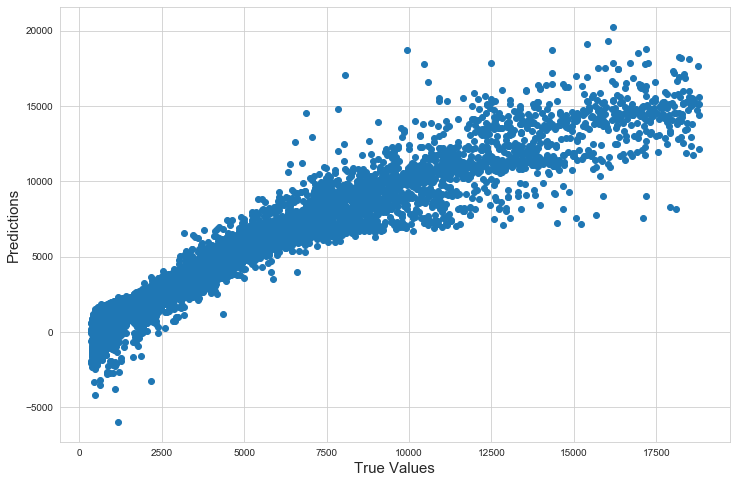

In [335]:
y_pred2 = lm2.predict(X_test2)
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(y_test2, y_pred2)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)

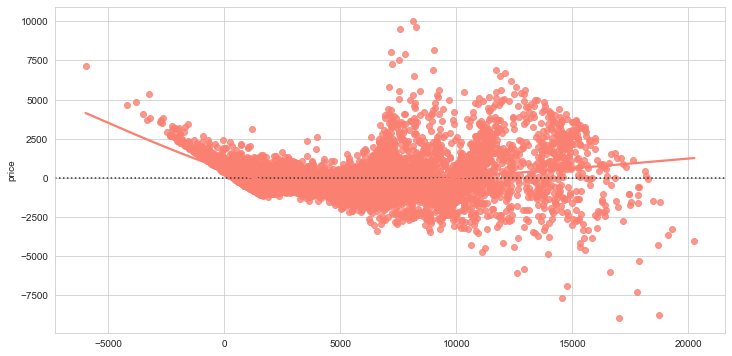

In [336]:
plt.figure(figsize=(12,6))
sns.residplot(y_pred2, y_test2, lowess=True, color="salmon")

In [337]:
print ("R2 Score:", lm2.score(X_test2, y_test2))

R2 Score: 0.9244584039577137


In [338]:
print ("R2 Score:", r2_score(y_test2, y_pred2))

R2 Score: 0.9244584039577137


In [339]:
test_mae2 = metrics.mean_absolute_error(y_test2, y_pred2)
test_mse2 = metrics.mean_squared_error(y_test2, y_pred2)
test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test2, y_pred2)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test2, y_pred2)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))))

Mean Absolute Error:723.694154815336
Mean Squared Error:1181220.7885636871
Root Mean Squared Error:1086.8398173437


In [340]:
print('Z-Score of Mean Absolute Error  Z:', test_mae2/price_std )
print('Z-Score of Root Mean Squared Error Z:' , test_rmse2/price_std)

Z-Score of Mean Absolute Error  Z: 0.18150258188649457
Z-Score of Root Mean Squared Error Z: 0.2725795581356648


In [341]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', int(train_rmse2), "vs. Testing: ", int(test_rmse2))

Training:  1091 vs. Testing:  1086


__Try with Lasso Model__

In [351]:
la2 = Lasso(normalize=True)
la2 = la2.fit(X_train2 , y_train2) 

In [353]:
y_train_pred2la = la2.predict(X_train2)

train_mae2la = metrics.mean_absolute_error(y_train2, y_train_pred2la)
train_mse2la = metrics.mean_squared_error(y_train2, y_train_pred2la)
train_rmse2la = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2la))

print('Mean Absolute Error:', train_mae2la )
print('Mean Squared Error:',  train_mse2la)
print('Root Mean Squared Error:' , train_rmse2la)

Mean Absolute Error: 841.9259977948012
Mean Squared Error: 1967226.979942543
Root Mean Squared Error: 1402.5786893941256


In [354]:
print('Z-Score of Mean Absolute Error:', train_mae2la/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse2la/price_std)

Z-Score of Mean Absolute Error: 0.21115514245947212
Z-Score of Root Mean Squared Error: 0.35176690557763063


Text(0, 0.5, 'Predictions')

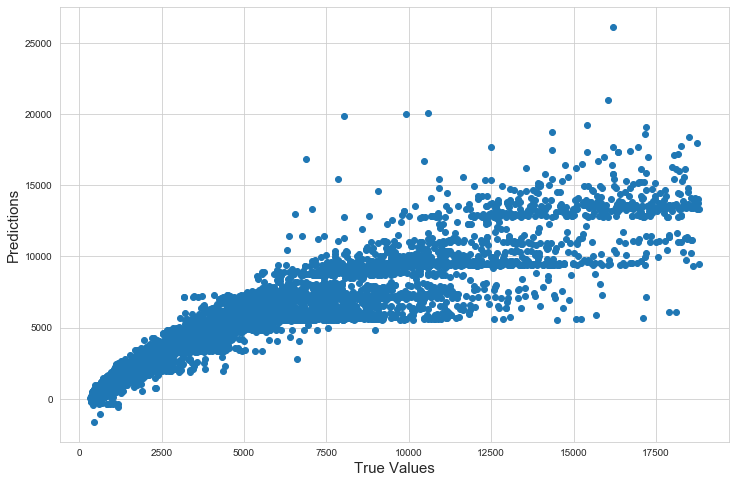

In [356]:
y_pred2la = la2.predict(X_test2)
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(y_test2, y_pred2la)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)

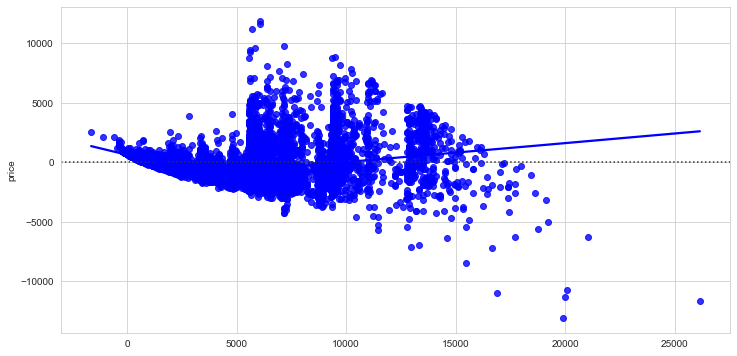

In [357]:
plt.figure(figsize=(12,6))
sns.residplot(y_pred2la, y_test2, lowess=True, color="blue")

In [359]:
print ("Lasso R2 Score:", la2.score(X_test2, y_test2))

Lasso R2 Score: 0.8778290581089265


In [360]:
print ("Lasso R2 Score:", r2_score(y_test2, y_pred2la))

Lasso R2 Score: 0.8778290581089265


In [361]:
test_mae2la = metrics.mean_absolute_error(y_test2, y_pred2la)
test_mse2la = metrics.mean_squared_error(y_test2, y_pred2la)
test_rmse2la = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2la))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test2, y_pred2la)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test2, y_pred2la)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2la))))

Mean Absolute Error:834.8262583273334
Mean Squared Error:1910349.5806384687
Root Mean Squared Error:1382.1539641582874


In [362]:
print('Z-Score of Mean Absolute Error  Z:', test_mae2la/price_std )
print('Z-Score of Root Mean Squared Error Z:' , test_rmse2la/price_std)

Z-Score of Mean Absolute Error  Z: 0.2093745269390999
Z-Score of Root Mean Squared Error Z: 0.3466443820088548


__Conclusion:__ As you can see from above, adding new feature 'carat^2' helped the model, the R2 score increases, and the rmse decrease, the Z score of RMSE is also better for both Multilinear regression model and Lasso model. But the bias in residual plot still look significant. We will do further feature engineering

### 5.2 Create new feature 'L/W' based EDA analysis


__A careful look at the previous EDA I found out that the diamonds prices all increase linearly with dimension x, y and z. Since diamond shapes are normally round or square, so there might be multicolinearity between these dimensions, the following are to check and drop features__

Text(0, 0.5, 'z')

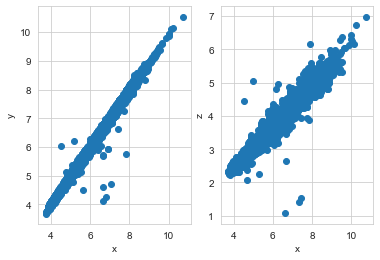

In [383]:
plt.subplot(1,2,1)
plt.scatter(df1.x, df1.y)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.scatter(df1.x, df1.z)
plt.xlabel('x')
plt.ylabel('z')

As we can see the dimensions have linear relationship with each other, so there maybe correlations between them. Next is to check this with correlation matrix. 

In [347]:
# firstly, let check by correlation coefficient
# Create correlation matrix
corr_matrix = X_train2.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [350]:
# Find index of feature columns with correlation greater than 0.96
to_drop = [column for column in upper.columns if any(upper[column] > 0.96)]
# if you change inplace to True it will go through and drop all of those columns from the dataset
to_drop

['x', 'y', 'z']

Since there are strong correlation between them, we can drop these features. And, this make sense because in this model, carat weight is existing, and the larger the dimension, the higher the weight, and we also already have created new feature 'carat^2', so this seem satisfying.  __But there is one important thing we should remember, the shape of the diamonds. Is it long, or square or round? So hereby drop the dimonsion features but add another new feature, the ratio of dimension__

In [389]:
df_features['L/W']=np.where(df_features['x']>df_features['y'], df_features['x']/df_features['y'], df_features['y']/df_features['x'])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [391]:
df_features['L/W'].min()

1.0

In [392]:
df_features.shape

(53910, 28)

__5.3 Feature selection, drop features which as high correlations__

Since these feature columns have correlation greater than 0.96, it is ok to drop them and make a new features dataframe, df_feature1

In [347]:
# firstly, let check by correlation coefficient
# Create correlation matrix
corr_matrix = X_train2.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [350]:
# Find index of feature columns with correlation greater than 0.96
to_drop = [column for column in upper.columns if any(upper[column] > 0.96)]
# if you change inplace to True it will go through and drop all of those columns from the dataset
to_drop

['x', 'y', 'z']

In [395]:
to_drop

['x', 'y', 'z']

In [393]:
df_features1 = df_features.drop(columns=['x','y','z'],inplace=False)

In [394]:
df_features1.shape

(53910, 25)

In [401]:
df_features3 = df_features1

__5.4 Make the target price to be logarithm value__ in order to get better fit

In [411]:
targetlog = np.log(target)

In [412]:
targetlog.shape

(53910,)

In [413]:
X_train33, X_test33, y_train33, y_test33 = train_test_split(df_features3, targetlog, random_state=34, test_size=0.2)
print('Training set features:', X_train33.shape, 'Target:', y_train33.shape)
print('Training set features:', X_test33.shape, 'Target:', y_test33.shape)

Training set features: (43128, 25) Target: (43128,)
Training set features: (10782, 25) Target: (10782,)


In [414]:
# instantiate a linear regression object and fit a model to training set
lm33 = LinearRegression()
# fit the linear regression to the data
lm33 = lm33.fit(X_train33, y_train33)
print(lm33.intercept_)
print(lm33.coef_)

5.921241075516716
[ 4.20037515e+00 -2.65523463e-03 -6.71066821e-04 -6.26699171e-01
  3.60474651e-01 -9.62748414e-02 -2.63693443e-01  1.04004813e-01
  3.67176143e-02  2.72674006e-01  2.12796371e-01  2.13807914e-01
  1.57588351e-01  1.21580333e-01  4.88400122e-02 -5.94948818e-02
 -1.77125726e-01 -3.05196003e-01 -6.19929098e-02 -1.84623189e-02
  5.53399520e-02  2.17697299e-02  3.34554685e-03 -9.33463299e-01
 -5.41741437e-01]


In [415]:
y_train_pred33 = lm33.predict(X_train33)

train_mae33 = metrics.mean_absolute_error(y_train33, y_train_pred33)
train_mse33 = metrics.mean_squared_error(y_train33, y_train_pred33)
train_rmse33 = np.sqrt(metrics.mean_squared_error(y_train33, y_train_pred33))

print('Mean Absolute Error:', train_mae33)
print('Mean Squared Error:',  train_mse33)
print('Root Mean Squared Error:' , train_rmse33)

Mean Absolute Error: 0.12214729183256245
Mean Squared Error: 0.027150790350204235
Root Mean Squared Error: 0.1647749688217365


In [419]:
print('Z-Score of Mean Absolute Error:', train_mae33/targetlog.std())
print('Z-Score of Root Mean Squared Error:' , train_rmse33/targetlog.std())

Z-Score of Mean Absolute Error: 0.12039308391950991
Z-Score of Root Mean Squared Error: 0.16240856716154825


Text(0, 0.5, 'Predictions')

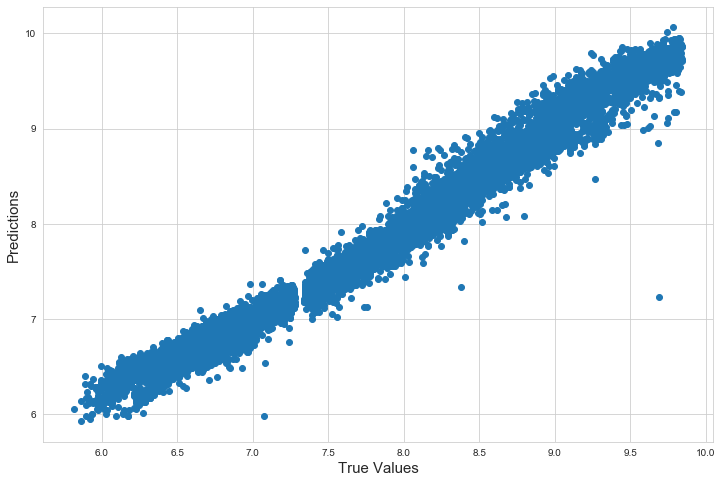

In [455]:
y_pred33 = lm33.predict(X_test33)
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(y_test33, y_pred33)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)

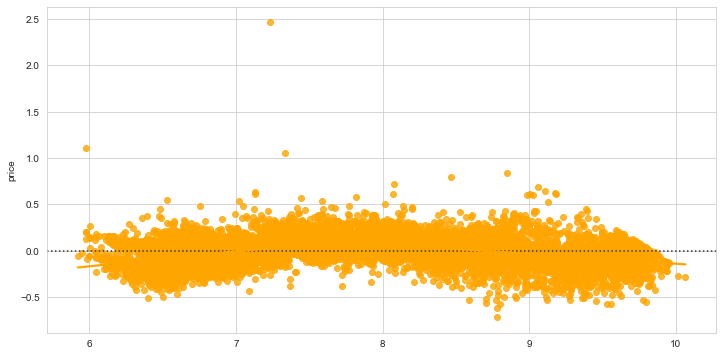

In [456]:
plt.figure(figsize=(12,6))
sns.residplot(y_pred33, y_test33, lowess=True, color="orange")

In [422]:
print ("R2 Score:", lm33.score(X_test33, y_test33))

R2 Score: 0.976756373755497


In [423]:
print ("R2 Score:", r2_score(y_test33, y_pred33))

R2 Score: 0.976756373755497


In [424]:
test_mae33 = metrics.mean_absolute_error(y_test33, y_pred33)
test_mse33 = metrics.mean_squared_error(y_test33, y_pred33)
test_rmse33 = np.sqrt(metrics.mean_squared_error(y_test33, y_pred33))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test33, y_pred33)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test33, y_pred33)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test33, y_pred33))))

Mean Absolute Error:0.12234848596997858
Mean Squared Error:0.023992173078314572
Root Mean Squared Error:0.1548940705072811


In [425]:
print('Z-Score of Mean Absolute Error  Z:', test_mae33/targetlog.std())
print('Z-Score of Root Mean Squared Error Z:' , test_rmse33/targetlog.std())

Z-Score of Mean Absolute Error  Z: 0.12059138862448246
Z-Score of Root Mean Squared Error Z: 0.1526695725254408


In [427]:
# Comparing our Model's performance on training data versus test data.
print('Training: ', train_rmse33, "vs. Testing: ", test_rmse33)

Training:  0.1647749688217365 vs. Testing:  0.1548940705072811


In [458]:
# save the final model to disk
filename = 'diamondpredict.sav'
pickle.dump(lm33, open(filename, 'wb'))

__Conclusion: After creating 2 new features, and feature selection to drop the high correlated features and make the target logarithm, I got a perfect model - lm33. This multilinear regression model is significant better than all the previous model. it has less independent variables, but has higher adjusted R2 Score - 0.977 and low Z-score of RMSE - 0.155__

__More importantly, the residuals plot of this model shows that the residuals are uniformly distributed besides the prediction, line is in middle, with very small bias, which means that this model fits well.__


__5.4 Use the lm33 Model to predict the diamonds price of diamonds on www.bluenile.com and compare them__

__(1). Change the data type in dataframe from scraping bluenile website, make the same independent variables__

In [486]:
df_blue.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'lxwratio'],
      dtype='object')

In [488]:
df_blue.rename(columns={'lxwratio':'L/W'}, inplace=True)

In [492]:
df_blue['carat^2'] = df_blue['carat'].map(lambda x: x**2)

In [496]:
df_blue1 = pd.concat([df_blue, pd.get_dummies(df_blue[['clarity','color','cut']])], 1)

In [502]:
df_blue1.drop(columns=['cut', 'color', 'clarity'], inplace=True)

In [505]:
df_blue1.columns.sort_values()

Index(['L/W', 'carat', 'carat^2', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'depth',
       'price', 'table'],
      dtype='object')

In [575]:
df_blue1 = df_blue1[df_blue1.price.map(len)<5]

In [578]:
df_blue1['price'] = df_blue1['price'].map(lambda x: x[-3:])

In [581]:
df_blue1['price'] = df_blue1['price'].map(lambda x: int(x))

In [588]:
blueprice = df_blue1['price']  # this is the prices on www.bluenile.com

In [589]:
bluedata = df_blue1.drop(columns=['price'],inplace=False)

In [591]:
bluedata['clarity_I1'] = 0

In [592]:
bluedata['cut_Fair'] = 0

In [594]:
bluedata['clarity_I1'] = bluedata.clarity_I1.astype('uint8')

In [595]:
bluedata['cut_Fair'] = bluedata.cut_Fair.astype('uint8')

__(2). Run the model to predict__

In [598]:
blue_pred = lm33.predict(bluedata)

(0, 10)

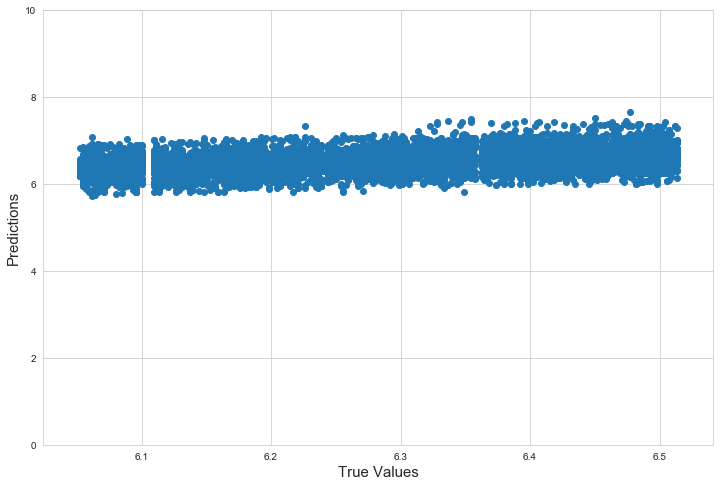

In [601]:
## The line / model
plt.figure(figsize = (12,8))
plt.scatter(np.log(blueprice), blue_pred)
plt.xlabel("True Values", fontsize = 15)
plt.ylabel("Predictions", fontsize = 15)
plt.ylim(0,10)

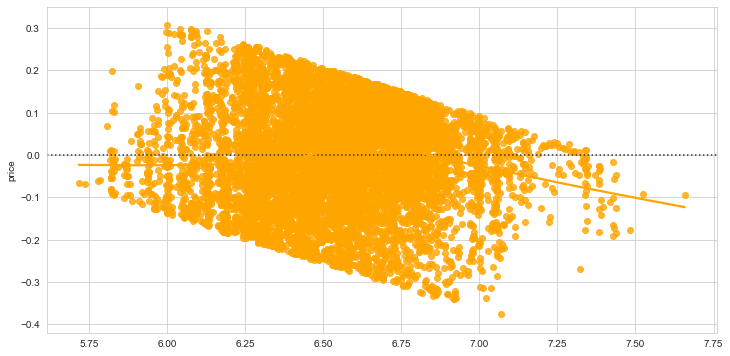

In [602]:
plt.figure(figsize=(12,6))
sns.residplot(blue_pred, np.log(blueprice), lowess=True, color="orange")

__(3). Compare the prices predicted by my model and the sales prices on www.bluenile.com__

In [612]:
# the mean price predicted are 28% higher than www.bluenile.com  
blueprice.mean(), np.exp(blue_pred).mean()

(558.5897173987062, 717.4682272565257)

In [629]:
np.exp(blue_pred).mean()/blueprice.mean()-1

0.2844279171440893

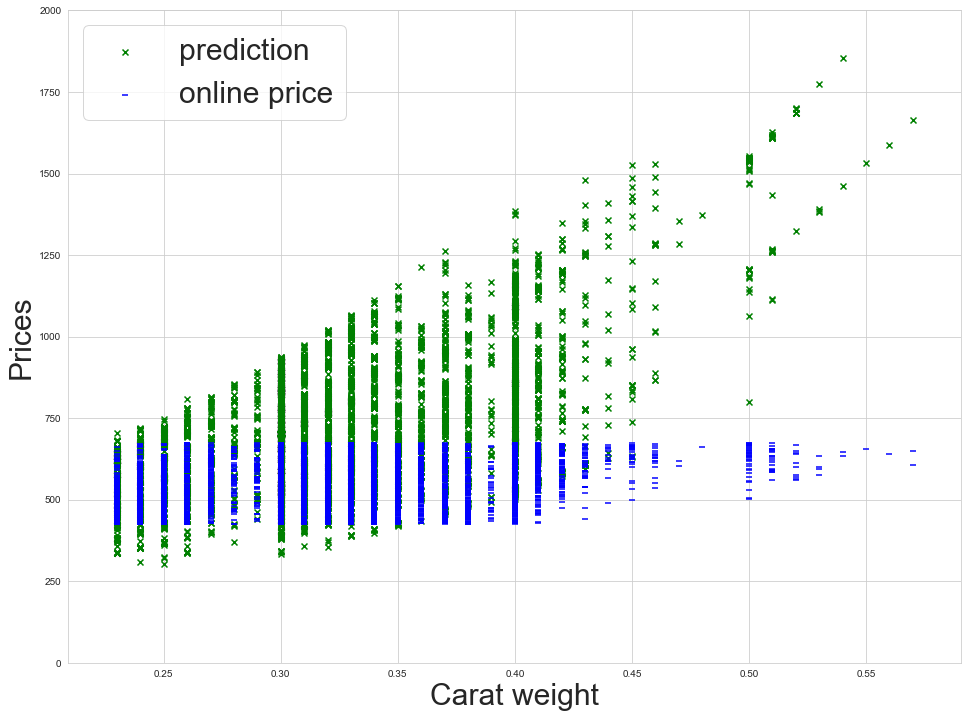

In [647]:
plt.figure(figsize=(16,12))
p1 = plt.scatter(bluedata.carat, np.exp(blue_pred), color = 'g', marker = 'x')
p2 = plt.scatter(bluedata.carat, blueprice, color = 'b', marker = '_')
plt.ylim(0,2000)
plt.xlabel('Carat weight', fontsize = 30)
plt.ylabel('Prices', fontsize = 30)
plt.legend((p1,p2), ('prediction','online price'), loc = 'upper left', fontsize = 30)

__After comparing the prices predicted and the online sales prices, I found out that average online sales prices of diamonds are more than 20% percent lower than the prediction prices. Also, for small diamonds, prices of prediction and online prices are similar, when it comes to larger diamonds, online sales price are significantly lower.__

## 6. Business/social case analysis & conclusions

__From all the above EDA, Hypothesis Testings, Modeling/Features Engineering and Prediction & Online Prices Comparison, the following conclusions can be made.__

__6.1 In the diamonds market, prices are like exponentially related to carat weight, as the carat weight get larger and larger, price increase faster and faster. The best prediction model is with logarithm transformation of target.__

__6.2 In reality, top quality diamonds(higher clarity, higher colorless) mainly lay in smaller diamonds range, it is difficult to get larger carat weight high clarity (or high color level) diamonds. Bigger diamonds are more likely to have middle or low clarity or colorless levels__

__6.3 Pure dimensions (x,y,z) are usually not cared in diamonds selection, since carat weight value can represent them. But the shape matters, so L/W and depth are important features that can affect diamonds prices.__

__6.4 Overall speaking, middle color level and middle clarity level have the most percentage in all levels.__

__6.5 There is statistically significant difference in carat weight of diamonds with different cut levels, there is statistical significant difference in prices of diamonds with different color levels.__

__6.6 There is association between the distributions of diamond clairity levels category and the color levels category (they are not independent), this is determined by diamonds forming mechanism and processing.__

__6.7 Prediction model developed with Kaggle dataset can predict the diamonds' prices accurately with data in kaggle dataset. But when predicting prices of diamonds on online retailers' websites, results are higher than online sales prices. Nevertheless, we can clearly see that the trends are similar. Normally, online sales prices are lower, this makes sense. And, datasets from different resources many not reflect each other very well.__